In [1]:
# DataFrame
import pandas as pd

# Datetime
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# 데이터 불러오기
custdf = pd.read_csv('c://data/marketing_campaign.csv', sep='	')

In [3]:
# 칼럼명 변경
custdf.columns = ['id','birthyear','edu','marital','income','kid','teen','enrolldate','recency',
                 'wine','fruit','meat','fish','sweet','gold','numdeal',
                 'buyweb','buycatalog','buystore','visitweb',
                 'cmp3','cmp4','cmp5','cmp1','cmp2','complain','z_costcontact','z_revenue','cmp6']
custdf.columns

Index(['id', 'birthyear', 'edu', 'marital', 'income', 'kid', 'teen',
       'enrolldate', 'recency', 'wine', 'fruit', 'meat', 'fish', 'sweet',
       'gold', 'numdeal', 'buyweb', 'buycatalog', 'buystore', 'visitweb',
       'cmp3', 'cmp4', 'cmp5', 'cmp1', 'cmp2', 'complain', 'z_costcontact',
       'z_revenue', 'cmp6'],
      dtype='object')

In [4]:
# 기초통계량
custdf.describe()

,id,birthyear,income,kid,teen,recency,wine,fruit,meat,fish,...,visitweb,cmp3,cmp4,cmp5,cmp1,cmp2,complain,z_costcontact,z_revenue,cmp6
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
# z_costcontact, z_revenue 삭제
custdf.drop(['z_costcontact', 'z_revenue'], axis = 1, inplace = True)

In [6]:
# id 열 유니크값 확인
len(custdf['id'].unique())

2240

In [7]:
### 결측치 및 이상치 처리 ###
# DataFrame 칼럼 형태 확인(컬럼명, 결측값, 타입)
custdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2240 non-null   int64  
 1   birthyear   2240 non-null   int64  
 2   edu         2240 non-null   object 
 3   marital     2240 non-null   object 
 4   income      2216 non-null   float64
 5   kid         2240 non-null   int64  
 6   teen        2240 non-null   int64  
 7   enrolldate  2240 non-null   object 
 8   recency     2240 non-null   int64  
 9   wine        2240 non-null   int64  
 10  fruit       2240 non-null   int64  
 11  meat        2240 non-null   int64  
 12  fish        2240 non-null   int64  
 13  sweet       2240 non-null   int64  
 14  gold        2240 non-null   int64  
 15  numdeal     2240 non-null   int64  
 16  buyweb      2240 non-null   int64  
 17  buycatalog  2240 non-null   int64  
 18  buystore    2240 non-null   int64  
 19  visitweb    2240 non-null  

In [8]:
# income 변수가 결측인 인덱스 조회
custdf.loc[custdf['income'].isna() == True]

,id,birthyear,edu,marital,income,kid,teen,enrolldate,recency,wine,...,buycatalog,buystore,visitweb,cmp3,cmp4,cmp5,cmp1,cmp2,complain,cmp6
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,1,7,6,0,0,0,0,0,0,0


In [9]:
# income 변수가 결측인 데이터는 제거하고 분석
custdf = custdf.loc[-custdf['income'].isna() == True]

# 결측값 있는지 재검증
custdf.isna().sum()

id            0
birthyear     0
edu           0
marital       0
income        0
kid           0
teen          0
enrolldate    0
recency       0
wine          0
fruit         0
meat          0
fish          0
sweet         0
gold          0
numdeal       0
buyweb        0
buycatalog    0
buystore      0
visitweb      0
cmp3          0
cmp4          0
cmp5          0
cmp1          0
cmp2          0
complain      0
cmp6          0
dtype: int64

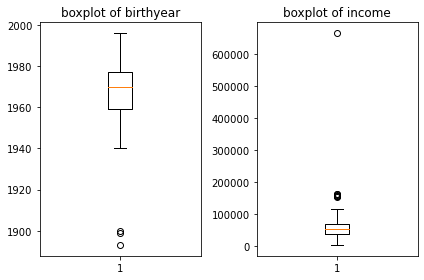

In [10]:
# boxplot of birthyear & income
plt.subplot(1,2,1); plt.boxplot(custdf['birthyear']); plt.title('boxplot of birthyear')
plt.subplot(1,2,2); plt.boxplot(custdf['income']); plt.title('boxplot of income')
plt.tight_layout()

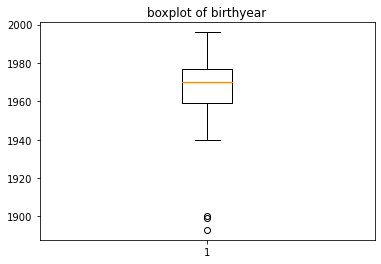

,id,birthyear,edu,marital,income,kid,teen,enrolldate,recency,wine,...,buycatalog,buystore,visitweb,cmp3,cmp4,cmp5,cmp1,cmp2,complain,cmp6
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,6,4,1,0,0,1,0,0,0,0


In [11]:
# birthyear 이상치 탐색
plt.boxplot(custdf['birthyear'])
plt.title('boxplot of birthyear')
plt.show()
custdf[(custdf['birthyear'] < 1930)]

In [12]:
# birthyear 이상치 제거
cust_birthyear = custdf[(custdf['birthyear'] < 1930)]
custdf = custdf[-(custdf['birthyear'] < 1930)]

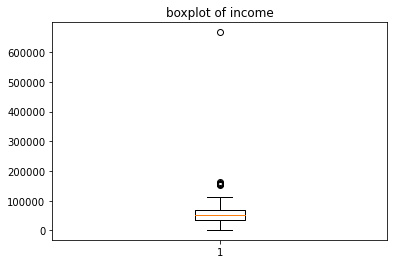

,id,birthyear,edu,marital,income,kid,teen,enrolldate,recency,wine,...,buycatalog,buystore,visitweb,cmp3,cmp4,cmp5,cmp1,cmp2,complain,cmp6
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,1,3,6,0,0,0,0,0,0,0


In [13]:
# income 이상치 탐색
plt.boxplot(custdf['income'])
plt.title('boxplot of income')
plt.show()
custdf.loc[custdf['income'] > 300000,:]

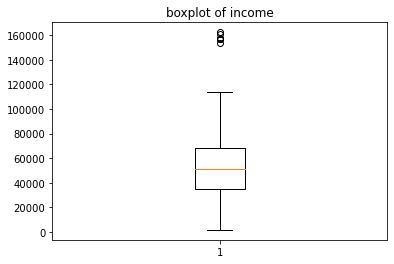

In [14]:
# income 300000 초과하는 이상치 제거 후 다시 탐색
custdf = custdf[-(custdf['income'] > 300000)]
plt.boxplot(custdf['income'])
plt.title('boxplot of income')
plt.show()

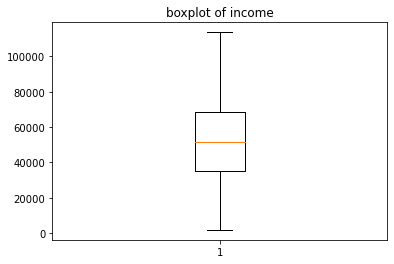

In [15]:
# income이 140000 초과하는 이상치 제거
custdf = custdf[-(custdf['income'] > 140000)]
plt.boxplot(custdf['income'])
plt.title('boxplot of income')
plt.show()

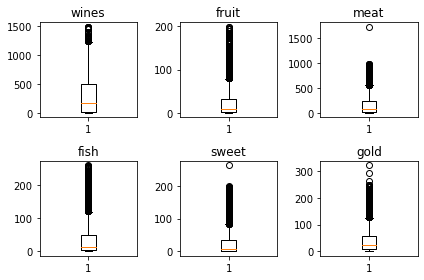

In [16]:
# boxplot of products
plt.subplot(2,3,1); plt.boxplot(custdf['wine']); plt.title('wines')
plt.subplot(2,3,2); plt.boxplot(custdf['fruit']); plt.title('fruit')
plt.subplot(2,3,3); plt.boxplot(custdf['meat']); plt.title('meat')
plt.subplot(2,3,4); plt.boxplot(custdf['fish']); plt.title('fish')
plt.subplot(2,3,5); plt.boxplot(custdf['sweet']); plt.title('sweet')
plt.subplot(2,3,6); plt.boxplot(custdf['gold']); plt.title('gold')
plt.tight_layout()

C:\Users\wngud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


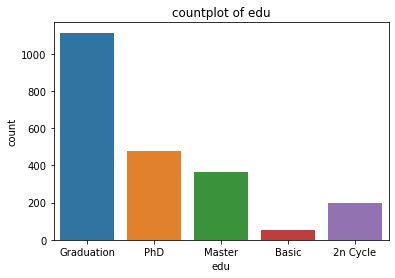

In [17]:
### 변수 변환 및 생성###
# countplot of edu
sns.countplot(custdf['edu'])
plt.title('countplot of edu')
plt.show()

C:\Users\wngud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


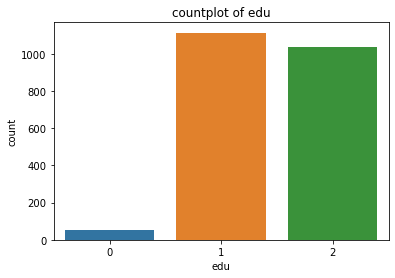

In [18]:
# edu 변수, 3개 범주로 변환
custdf['edu'].replace('Basic', 0, inplace=True)
custdf['edu'].replace('Graduation', 1, inplace=True)
custdf['edu'].replace(['PhD', 'Master', '2n Cycle'], 2, inplace=True)
sns.countplot(custdf['edu'])
plt.title('countplot of edu')
plt.show()

C:\Users\wngud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


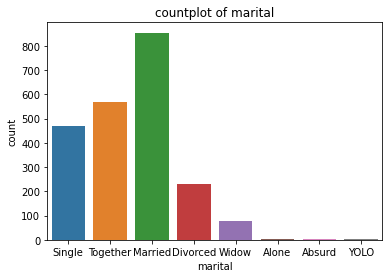

In [19]:
# countplot of marital
sns.countplot(custdf['marital'])
plt.title('countplot of marital')
plt.show()

C:\Users\wngud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


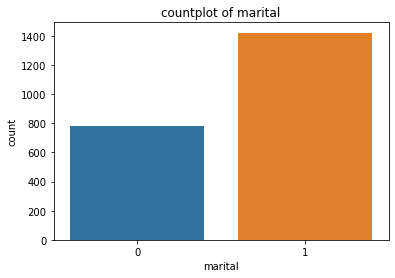

In [20]:
# marital 변수, 2개 범주로 변환
custdf['marital'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 0, inplace=True)
custdf['marital'].replace(['Together', 'Married'], 1, inplace=True)
sns.countplot(custdf['marital'])
plt.title('countplot of marital')
plt.show()

In [21]:
# 오늘 날짜 추정값
# enrolldate의 가장 최근값 + recency의 최대값

# yyyy-mm-dd 형식으로 변환
custdf['enrolldate'] = pd.to_datetime(custdf['enrolldate'])

# 오늘 날짜 추정값
today = (custdf['enrolldate'].max()
         + dt.timedelta(days = custdf['recency'].max())); today

Timestamp('2015-03-15 00:00:00')

In [22]:
# 변수 생성
# age
custdf['age'] = today.year - custdf['birthyear']

# kids
custdf['kids'] = custdf['kid'] + custdf['teen']

# totalcmp
custdf['totalcmp'] = custdf['cmp1'] + custdf['cmp2'] + custdf['cmp3'] + custdf['cmp4'] + custdf['cmp5'] + custdf['cmp6']

In [23]:
# 변수 제거
custdf.drop(columns = ['id', 'birthyear', 'kid', 'teen', 'enrolldate', 'recency',
                      'cmp3', 'cmp4', 'cmp5', 'cmp1', 'cmp2', 'cmp6'], inplace = True)

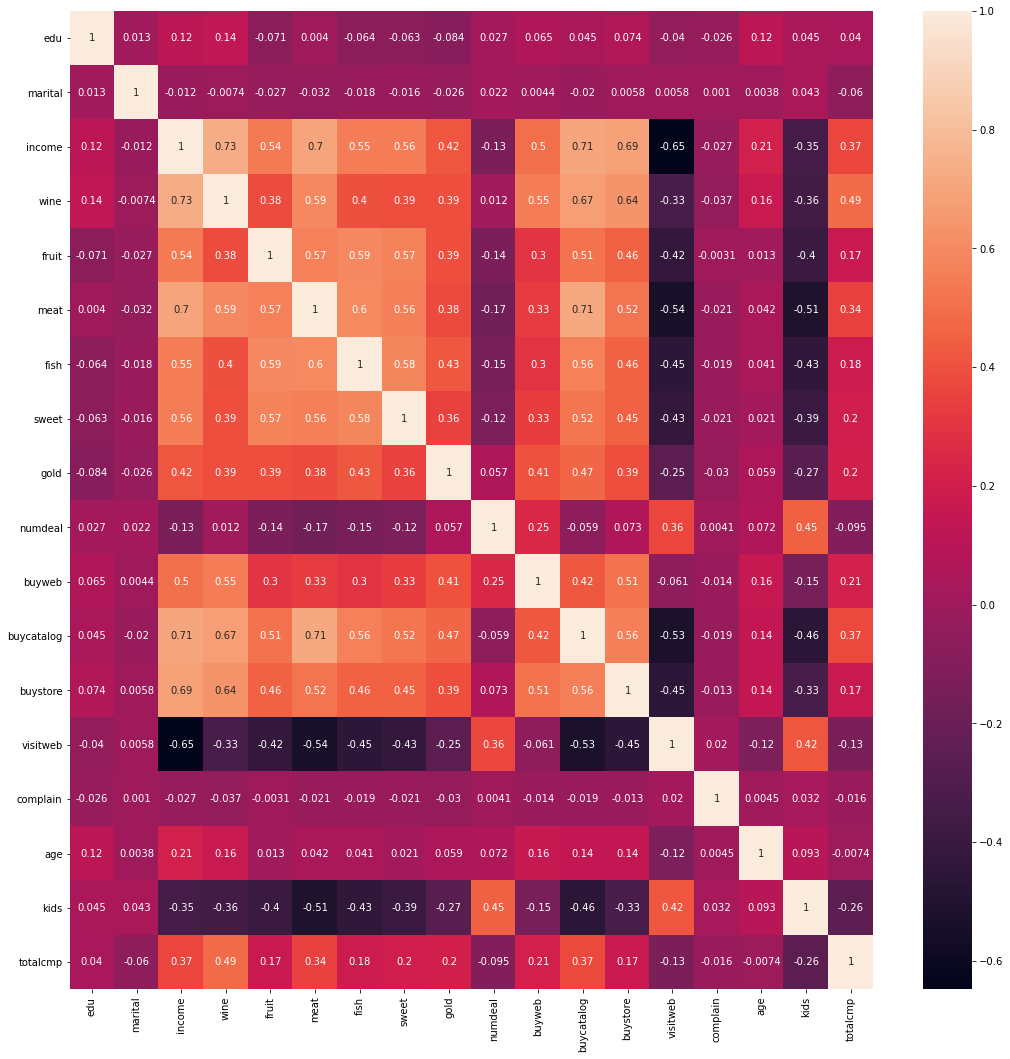

In [24]:
### 상관분석 ###

# 상관계수 행렬
plt.figure(figsize = (len(custdf.columns), len(custdf.columns)))
sns.heatmap(custdf.corr(method = 'pearson'), annot = True)
plt.show()

In [25]:
# 상관계수 내림차순 정렬
tmp = custdf.corr(method = 'pearson').unstack()
corrdfdesc = pd.DataFrame(tmp[tmp < 1].sort_values(ascending = False), columns=['corr'])
corrdfdesc.style.background_gradient(cmap = 'viridis')

,,corr
income,wine,0.730495
wine,income,0.730495
buycatalog,meat,0.714382
meat,buycatalog,0.714382
income,buycatalog,0.710057
buycatalog,income,0.710057
income,meat,0.702500
meat,income,0.702500
income,buystore,0.687206
buystore,income,0.687206


In [26]:
# 상관계수 오름차순 정렬
corrdfasc = pd.DataFrame(tmp[tmp < 1].sort_values(ascending = True), columns = ['corr'])
corrdfasc.style.background_gradient(cmap = 'viridis')

,,corr
income,visitweb,-0.648306
visitweb,income,-0.648306
meat,visitweb,-0.543387
visitweb,meat,-0.543387
buycatalog,visitweb,-0.530623
visitweb,buycatalog,-0.530623
meat,kids,-0.513629
kids,meat,-0.513629
buycatalog,kids,-0.455504
kids,buycatalog,-0.455504


In [27]:
# 상관계수의 절대값 오름차순 정렬
corrdfzero = pd.DataFrame(tmp.abs()[tmp < 1].sort_values(ascending = True), columns = ['corr'])
corrdfzero.style.background_gradient(cmap = 'viridis')

,,corr
marital,complain,0.001020
complain,marital,0.001020
fruit,complain,0.003135
complain,fruit,0.003135
marital,age,0.003800
age,marital,0.003800
edu,meat,0.003962
meat,edu,0.003962
numdeal,complain,0.004142
complain,numdeal,0.004142


In [ ]:
# pairplot
sns.pairplot(custdf)

In [ ]:
# corr 작은 변수들 제거
custdf.drop(['marital', 'complain'], axis = 1, inplace = True)

In [ ]:
### elbow method ###

# 데이터 스케일링
scaler = StandardScaler()
custdf_scaling = scaler.fit_transform(custdf.values)

# inertia 계산
tmp = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, max_iter = 1000)
  kmeans.fit(custdf_scaling)
  tmp.append(kmeans.inertia_)
  print('n_cluster', i, ':', kmeans.inertia_)

plt.plot(range(1, 11), tmp, marker = 'o')
plt.title('elbow method')
plt.xlabel('number of cluster')
plt.show()

In [ ]:
# clustering, k = 3
kmean = KMeans(n_clusters = 3, max_iter = 1000)
kmean.fit(custdf_scaling)
kmean.labels_
custdf['cluster'] = kmean.labels_

In [ ]:
# 각 군집에 할당된 인덱스 개수
custdf['cluster'].value_counts()

In [ ]:
# 개인정보에 따른 구분
sns.pairplot(custdf, hue = 'cluster', vars = ['income','age','edu','kids'], palette = 'viridis')

In [ ]:
# 구매상품군에 따른 구분
sns.pairplot(custdf, hue = 'cluster', vars = ['wine','fruit','meat','fish','sweet','gold'], palette = 'viridis')

In [ ]:
# 구매경로에 따른 구분
sns.pairplot(custdf, hue = 'cluster', vars = ['buyweb','buycatalog','buystore'], palette = 'viridis')

In [ ]:
# 캠페인민감도에 따른 구분
sns.pairplot(custdf, hue = 'cluster', vars = ['numdeal','totalcmp','visitweb'], palette = 'viridis')

In [ ]:
x = custdf
labels = custdf['cluster']
sklearn.metrics.silhouette_score(x, labels, metric='euclidean', sample_size=None)